In [1]:
# KNN Classification
import  pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter('ignore')

In [2]:
dfzoo = pd.read_csv('D:/Work/Data Science and Analyst Course/ExcelR/Data Science/Assignments/13_KNN/Zoo.csv')


dfzoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
dfzoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
dfzoo["animal name"] = label_encoder.fit_transform(dfzoo["animal name"])
dfzoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
dfzoo.shape

(101, 18)

In [6]:
dfzoo['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [7]:
dfzoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [8]:
array = dfzoo.values
X = array[:, 1:17]
Y = array[:, 17]

In [9]:
X.shape,Y.shape

((101, 16), (101,))

In [10]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.30 , random_state= 0)

### KNN Classifier with 5 neigbours

In [11]:
KNN_classifier  = KNeighborsClassifier(n_neighbors = 5 , metric = "minkowski" , p = 2 )
KNN_classifier.fit(x_train , y_train)

KNeighborsClassifier()

In [12]:
y_pred = KNN_classifier.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_pred , y_test)
cm

array([[11,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  2]], dtype=int64)

In [14]:
accuracy_score(y_pred , y_test)

0.9354838709677419

### KNN Classifier with 10 neigbours

In [15]:
KNN_classifier_10  = KNeighborsClassifier(n_neighbors = 10 , metric = "minkowski" , p = 2 )
KNN_classifier_10.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=10)

In [16]:
y_pred = KNN_classifier_10.predict(x_test)

In [17]:
cm = confusion_matrix(y_pred , y_test)
cm

array([[11,  0,  0,  0,  1,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  7,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [18]:
accuracy_score(y_pred , y_test)

0.8387096774193549

In [19]:
#### As accuracy is degradede after increasing neighbours, So first suggested model is better.

In [20]:
kfold = KFold(n_splits=5)

In [21]:
model = KNeighborsClassifier(n_neighbors=10)
results = cross_val_score(model, x_train,y_train ,cv=kfold)
results.mean()

0.7

In [22]:
n_neighbors1 = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors1)

In [23]:
model_1 =  KNeighborsClassifier()
grid = GridSearchCV(estimator= model_1,  param_grid=param_grid)
grid.fit(X , Y )

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [24]:
print(grid.best_score_)

0.97


In [25]:
grid_y_pred = grid.predict(X)

In [26]:
grid_cm  = confusion_matrix (grid_y_pred , Y)
grid_cm

array([[41,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0, 10]], dtype=int64)

In [27]:
accuracy_score(grid_y_pred , Y)

1.0

### Visualizing the CV results

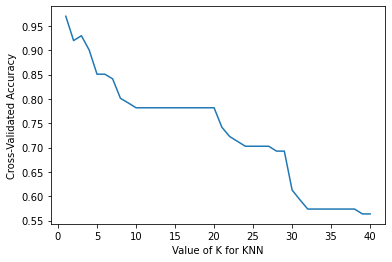

In [28]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

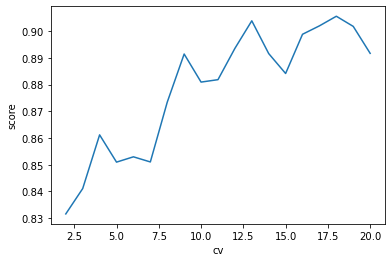

0.9055555555555556


In [29]:
### Let's find best CV value

import matplotlib.pyplot as plt
%matplotlib inline
k_range = range(2,21)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = 5)
    scores = cross_val_score(knn, X, Y, cv=k)
    k_score.append(scores.mean())
plt.plot(k_range, k_score)
plt.xlabel("cv")
plt.ylabel("score")
plt.show()
print(max(k_score))

### Error Plot for different values of k

In [30]:
error_rate=[]
for i in range(1,40):
    knn_model= KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    pred_i=knn_model.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test).round(2))
print(error_rate)

[0.03, 0.03, 0.06, 0.06, 0.06, 0.06, 0.1, 0.13, 0.13, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.39, 0.39, 0.39, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.48, 0.48, 0.48]


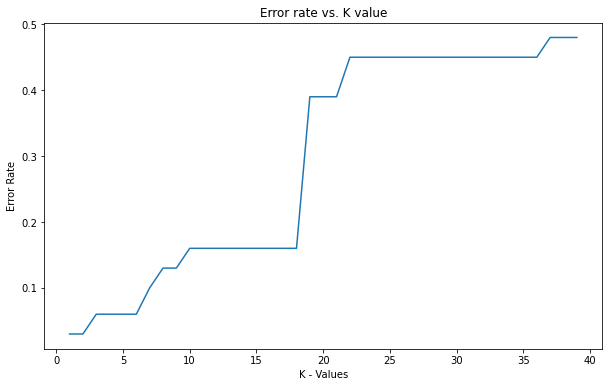

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)
plt.xlabel('K - Values')
plt.ylabel('Error Rate')
plt.title('Error rate vs. K value')
plt.show()

In [32]:
# Grid-Search without applying cross-validation :
from sklearn.model_selection import GridSearchCV

param_grid=dict(n_neighbors=range(1,40))
knn_models=KNeighborsClassifier()
grid= GridSearchCV(estimator=knn_models,param_grid=param_grid)
grid.fit(X,Y)
print(grid.best_score_)
grid.best_params_

0.97


{'n_neighbors': 1}

In [33]:
clf = GridSearchCV(estimator=knn_models, param_grid = param_grid)
clf.fit(x_train, y_train)
print(grid.best_score_)     
grid.best_params_

0.97


{'n_neighbors': 1}

In [34]:
pred = clf.predict(x_test)
pd.crosstab(y_test, pred)

col_0,1,2,3,4,5,6,7
row_0,,,,,,,
1,11,0,0,0,0,0,0
2,0,6,0,0,0,0,0
3,0,0,1,1,0,0,0
4,0,0,0,7,0,0,0
5,0,0,0,0,1,0,0
6,0,0,0,0,0,2,0
7,0,0,0,0,0,0,2
